# Portfolio assignment week 6

## 1. Decision Trees and Naive bayes
The scikit-learn library provides different parameters for decision trees and naive bayes. 

Based on the last code example [in the accompanying notebook](../Exercises/E_DT_NB.ipynb), add several new models to the `classifiers` variable. These models should have different parameters. For instance, create a new decision tree with a max depth of 1. Another possibility is to add different datasets or add noise.

Try to understand why some models behave differently than others. Give arguments what influences model performance and why.


In [93]:
import sklearn
print(sklearn.__version__)

from sklearn.inspection import DecisionBoundaryDisplay

1.3.0


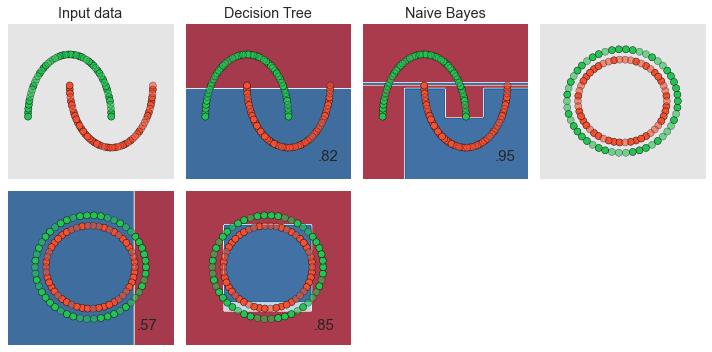

In [94]:
from sklearn.datasets import make_moons, make_circles
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

datasets = [make_moons(), make_circles()]
names = ['Decision Tree', 'Naive Bayes']
# Create different classifiers with different parameters
classifiers = [
    tree.DecisionTreeClassifier(max_depth=1),  # Decision Tree with max depth of 1
    tree.DecisionTreeClassifier(max_depth=5),  # Decision Tree with max depth of 5
    GaussianNB(),  # Gaussian Naive Bayes
]
figure = plt.figure(figsize=(10, 5))

i = 1

# iterate over datasets
for ds_count, ds in enumerate(datasets):
    X, y = ds
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0
    )
    
    # determining min point and max point and add margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # plot dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#23C552', '#F84F31'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # plot original
    if ds_count == 0:
        ax.set_title('Input data')
        
    # plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # plot testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # make pipeline to make it easier
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )
        
        # plot training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # plot testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_count == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
        
plt.tight_layout()
plt.show()


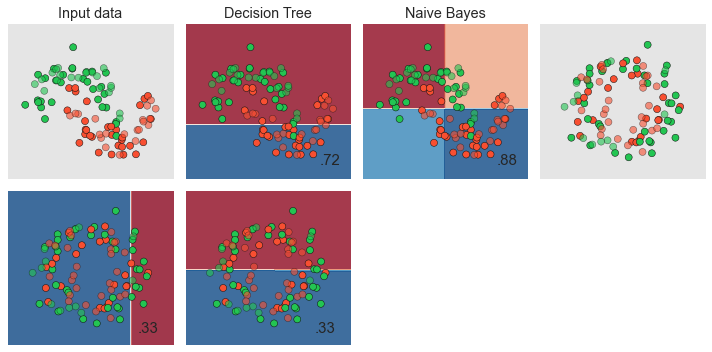

In [95]:
from sklearn.datasets import make_moons, make_circles
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

names = ['Decision Tree', 'Naive Bayes']

# Generate a moon-shaped dataset with added noise
noisy_moons = make_moons(noise=0.2)

# Add the noisy dataset to the datasets list
datasets = [noisy_moons, make_circles(noise=0.2)]
# Create different classifiers with different parameters
classifiers = [
    tree.DecisionTreeClassifier(max_depth=1),  # Decision Tree with max depth of 1
      # Multinomial Naive Bayes
      # Complement Naive Bayes
    BernoulliNB(),  # Bernoulli Naive Bayes
    CategoricalNB(),  # Categorical Naive Bayes
]
figure = plt.figure(figsize=(10, 5))

i = 1

# iterate over datasets
for ds_count, ds in enumerate(datasets):
    X, y = ds
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0
    )
    
    # determining min point and max point and add margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # plot dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#23C552', '#F84F31'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # plot original
    if ds_count == 0:
        ax.set_title('Input data')
        
    # plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # plot testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # make pipeline to make it easier
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )
        
        # plot training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # plot testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_count == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
        
plt.tight_layout()
plt.show()

### 2. Decision Tree Evaluation
As shown in the [in the accompanying notebook](../Exercises/E_DT_NB.ipynb) it is possible to visualize the decision tree. 

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the [breast cancer dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) which you can find on assemblix2019 (`/data/datasets/DS3/`). Go through the data science pipeline as you've done before:

1. Try to understand the dataset globally.
2. Load the data.
3. Exploratory analysis
4. Preprocess data (skewness, normality, etc.)
5. Modeling (cross-validation and training)
6. Evaluation
7. **Explanation**

Explain how the decision tree behaves under certain circumstances. What features seem important and how are the decisions made?

In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn import preprocessing

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [97]:
data = 'car_evaluation.csv'
df = pd.read_csv(data, header=None)

[Car Evaluation Database](https://archive.ics.uci.edu/dataset/19/car+evaluation)

In [98]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [99]:
col_names = ['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names
col_names

['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [100]:
df.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [101]:
print(df.shape)
print(df.info(),"\n",75*"_")
print(df.describe(),"\n",75*"_")
print("nulls : ",df.isnull().sum().sum())

(1728, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maintenance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lug_boot     1728 non-null   object
 5   safety       1728 non-null   object
 6   class        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None 
 ___________________________________________________________________________
       buying maintenance doors persons lug_boot safety  class
count    1728        1728  1728    1728     1728   1728   1728
unique      4           4     4       3        3      3      4
top     vhigh       vhigh     2       2    small    low  unacc
freq      432         432   432     576      576    576   1210 
 __________________________________________________________________________

In [102]:
for col in col_names:
    print(df[col].value_counts())
    

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintenance, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


C:\Users\hassa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

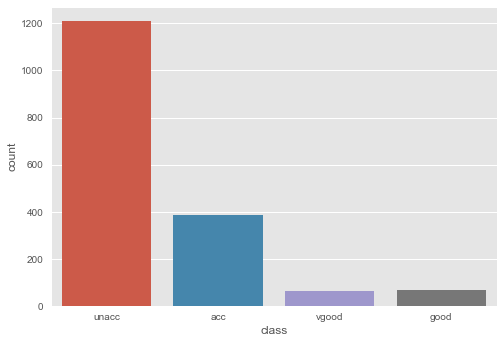

In [103]:
sns.countplot(df['class'])

In [104]:
X = df.drop(['class'], axis=1)

y = df['class']
X.head()

,buying,maintenance,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [105]:
# Encode Categorical
import category_encoders as ce

In [106]:
# encode variables with ordinal encoding
#Ordinal Encoder: This encoder maps categorical variables to ordinal integers based on the order of the categories.
encoder = ce.OrdinalEncoder(cols=['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety'])
X = encoder.fit_transform(X)


In [107]:
car_df = DecisionTreeClassifier(random_state=0)
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores = cross_validate(car_df, X, y, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precisoin score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())


Accuracy score : 0.882
Precisoin score : 0.881
Recall score : 0.839
F1 score : 0.815


#### Parameter tuning - gridSearchCV

In [108]:
para_grid = {
    'min_samples_split' : range(10,500,20),
    'max_depth': range(1,20,2),
    'criterion': ("gini", "entropy"),
    'min_samples_leaf': range(1, 50, 5)
}

car_tree = DecisionTreeClassifier()
car_cv = GridSearchCV(car_tree,
                   para_grid,
                   scoring='accuracy',
                   cv=5,
                   n_jobs=-1)
car_cv.fit(X,y)

best_parameters = car_cv.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 26, 'min_samples_split': 10}


In [109]:
car = car_cv.best_estimator_
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores = cross_validate(car,X,y, cv=10, scoring=scoring)
#print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precisoin score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.844
Precisoin score : 0.804
Recall score : 0.740
F1 score score : 0.726


Once the DecisionTreeClassifier was trained and its score was evaluated using the default settings, the model was then refitted using hyperparameter tuning involving various parameter values. The optimal configuration achieved was 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 26, and 'min_samples_split': 10.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33,
                                                    random_state=42)

X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [111]:
y_train.shape, y_test.shape

((1157,), (571,))

In [112]:
car.fit(X_train,y_train)
y_pred = car.predict(X_test)
print(metrics.classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

         acc     0.8182    0.6279    0.7105       129
        good     0.3333    0.3000    0.3158        20
       unacc     0.9279    0.9723    0.9496       397
       vgood     0.5789    0.8800    0.6984        25

    accuracy                         0.8669       571
   macro avg     0.6646    0.6950    0.6686       571
weighted avg     0.8670    0.8669    0.8624       571



In [113]:
car_entropy = DecisionTreeClassifier(criterion='gini', max_depth=5,random_state=0)
car_entropy.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [114]:
y_pred_gini = car_entropy.predict(X_test)
y_pred_gini[:5]

array(['unacc', 'good', 'unacc', 'acc', 'unacc'], dtype=object)

[Text(0.375, 0.9166666666666666, 'x[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.3125, 0.75, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.4375, 0.75, 'x[3] <= 1.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.375, 0.5833333333333334, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]'),
 Text(0.5, 0.5833333333333334, 'x[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.25, 0.4166666666666667, 'x[1] <= 2.5\ngini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.125, 0.25, 'x[0] <= 1.5\ngini = 0.259\nsamples = 131\nvalue = [20, 0, 111, 0]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 70\nvalue = [0, 0, 70, 0]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.441\nsamples = 61\nvalue = [20, 0, 41, 0]'),
 Text(0.375, 0.25, 'x[5] <= 2.5\ngini = 0.382\nsamples = 140\nvalue = [104, 0, 36, 0]'),
 Text(0.3125, 0.08333333333333333, 'gini = 0.5\nsamples = 70\nvalue = [36, 0,

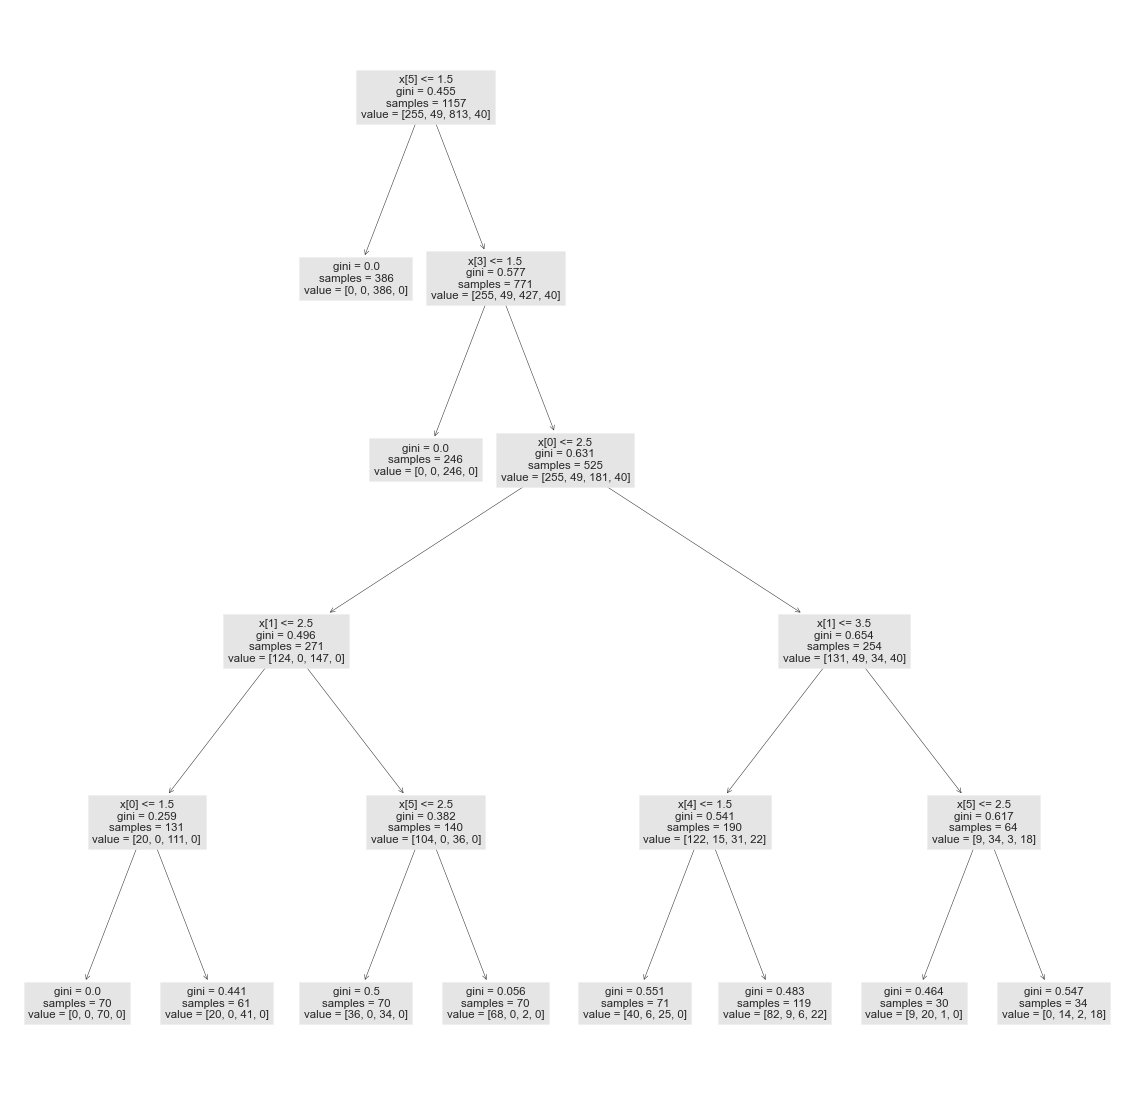

In [115]:
from sklearn import tree
plt.figure(figsize=(20, 20))

tree.plot_tree(car_entropy.fit(X_train, y_train))

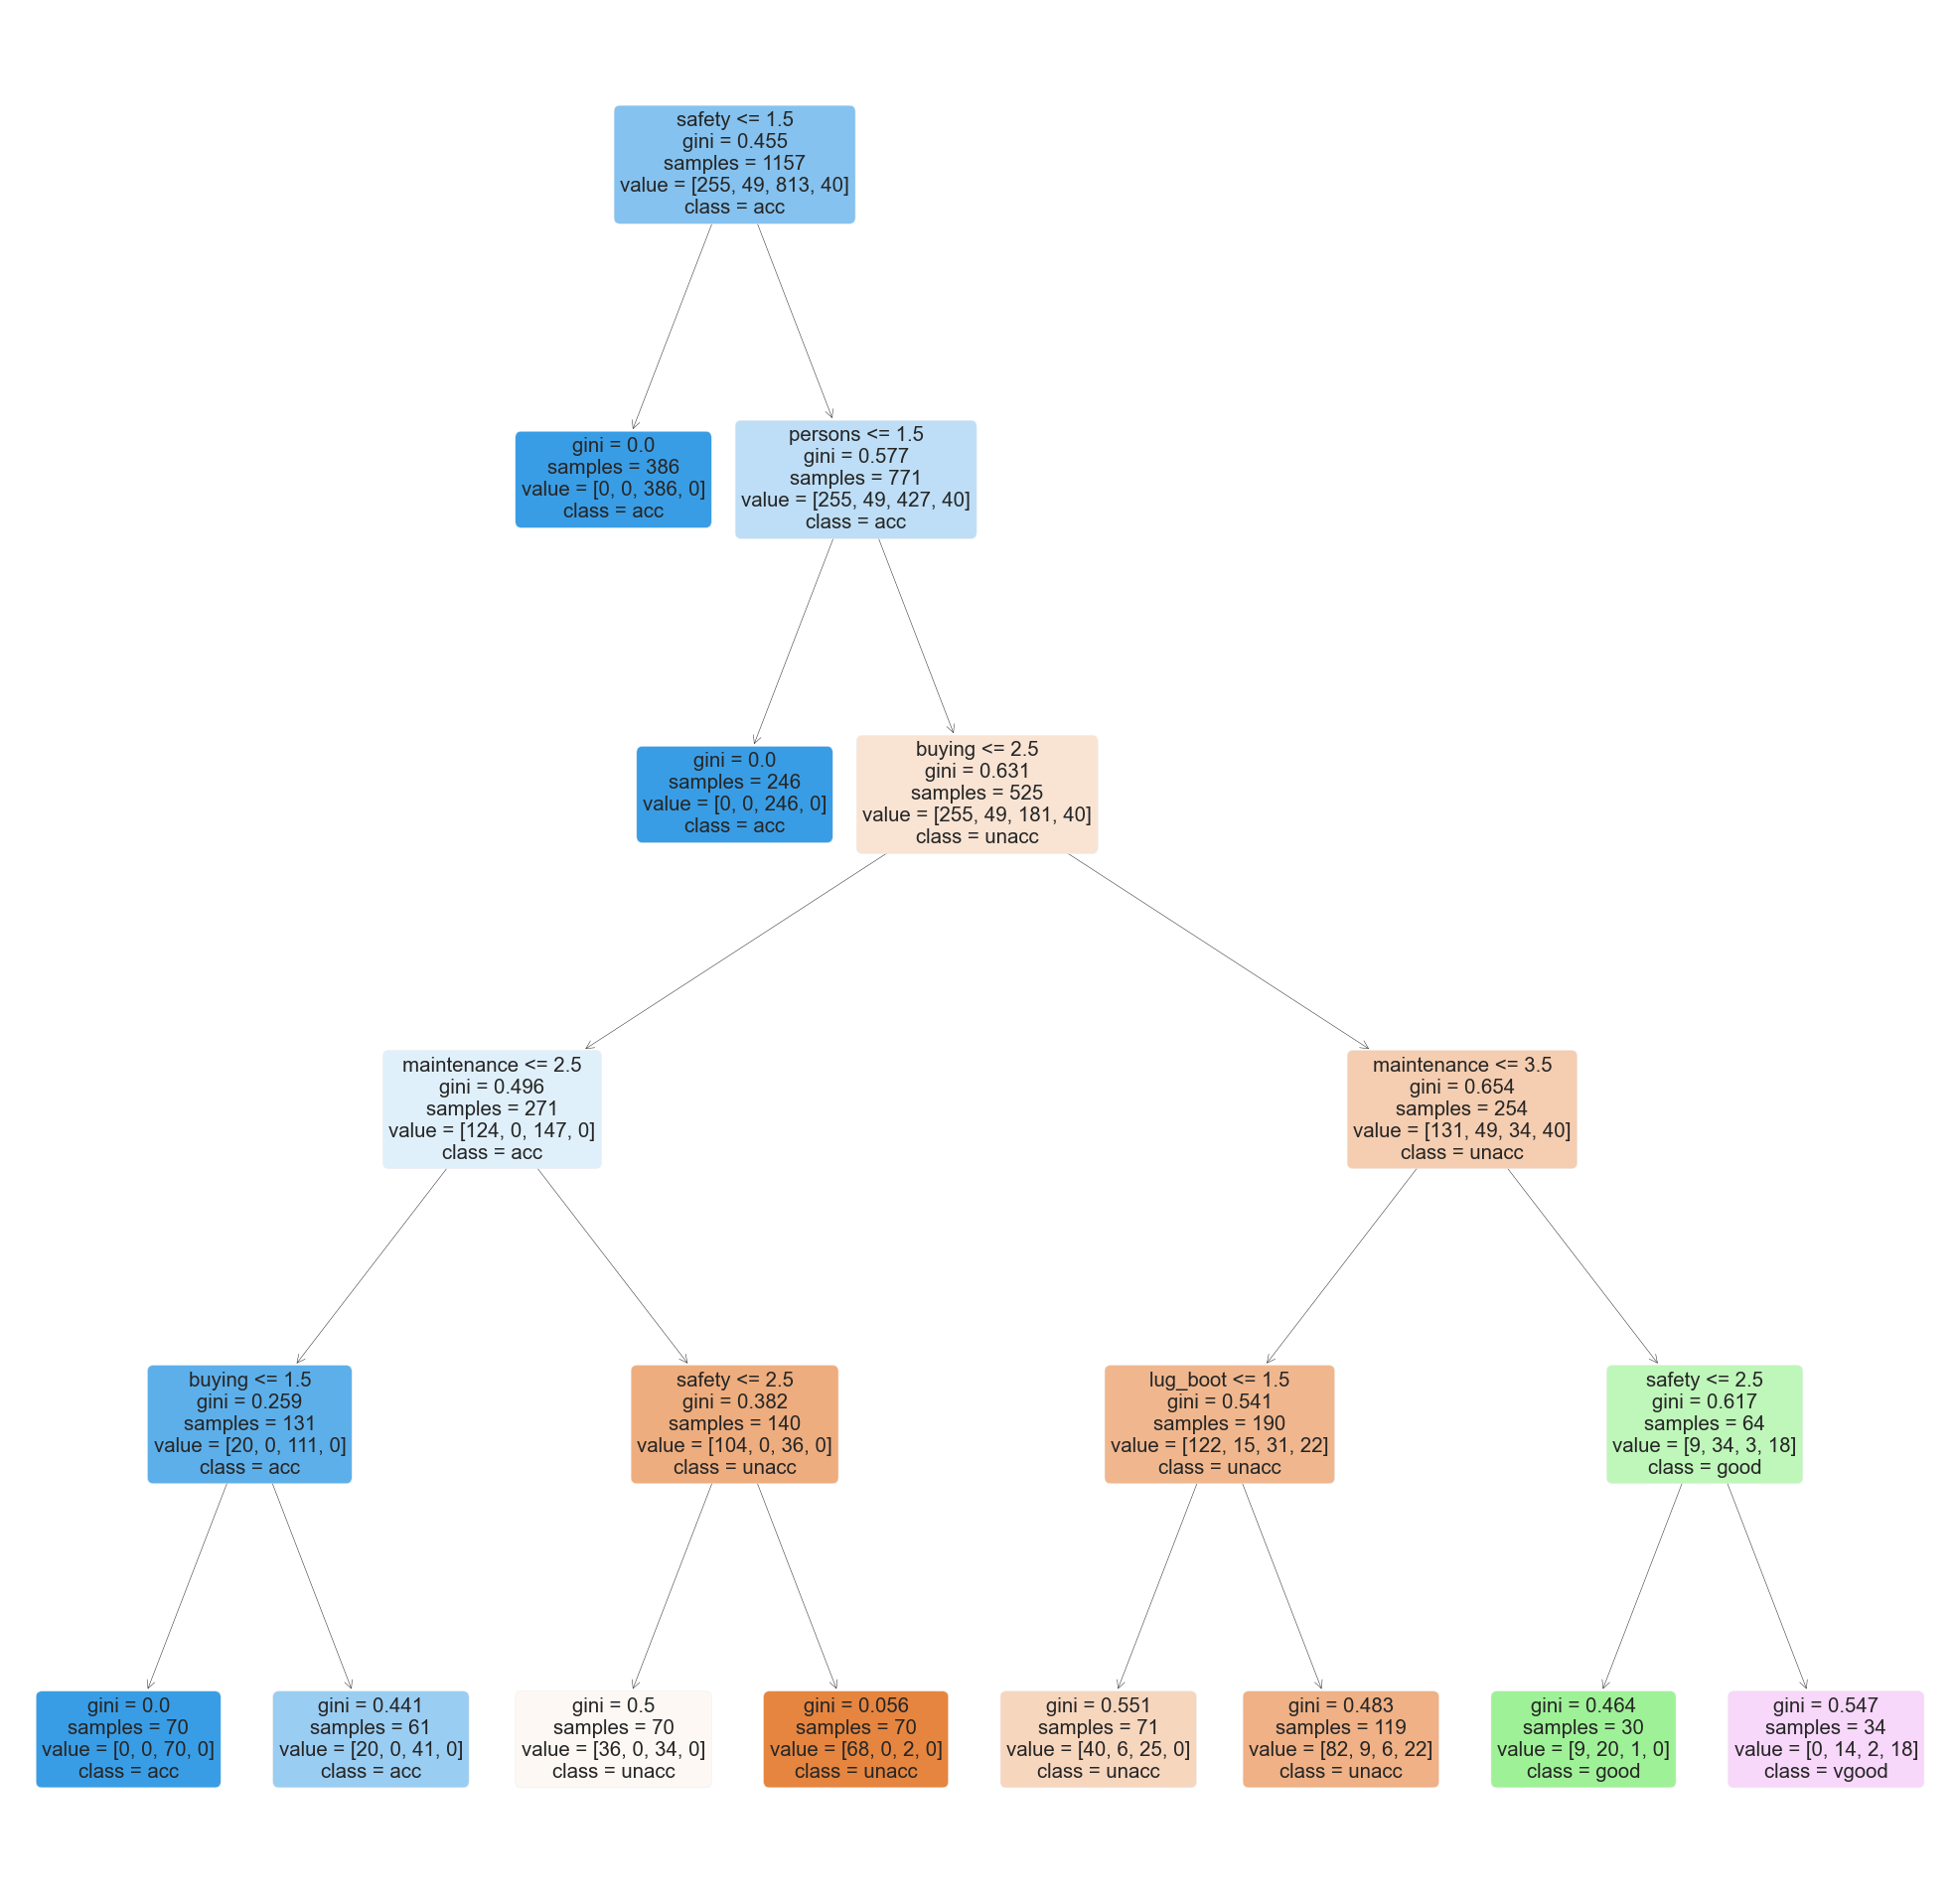

In [116]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 35))
tree.plot_tree(
    car_entropy,
    feature_names=X_train.columns.tolist(),
    class_names=y_train.unique().tolist(),
    filled=True,
    rounded=True,
)
plt.show()

## 3. Naive Bayes 

During the Corona pandemic, seven roommates in a student house did a Corona test. The table below show the data of these students: whether they experiences shivers, had a running nose, or had a headache. The test result is also shown.

Roommate | shivers | running nose | headache | test result
--|--|--|--|--
1 | Y | N | No | Negative
2 | N | N | Mild | Negative
3 | Y | Y | No | Positive
4 | N | Y | No | Negative
5 | N | N | Heavy | Positive
6 | Y | N | No | Negative
7 | Y | Y | Mild | Positive


Explain why it is not useful to include the column 'Roommate' in a classification procedure.

Train a [Categorical Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html) classifier on this dataset, where the Test Results are your classes and the other features the data. For this to work, you'll need [Pandas `get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to transform the nominal data into something that sklearn can work with. Use all seven rows in your training.

If you let your fitted classifier predict the test results (based on all the data), you will (hopefully) see that the prediction for observation number 5 (1-based) is wrong (it predicts Negative while the actual value is Positive). Show by manual calculation that the prediction for this instance is indeed higher ($p=0.527$) for the Negative class than for the Positive class.


In [117]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

# Step 1: Data Preparation
# Assign numerical values to the categories
shivers = [1, 0, 1, 0, 0, 1, 1]
running_nose = [0, 0, 1, 1, 0, 0, 1]
headache = [0, 1, 0, 0, 2, 0, 1]
test_result = [0, 0, 1, 0, 1, 0, 1]

# Convert lists to NumPy arrays
X = np.array([shivers, running_nose, headache]).T
y = np.array(test_result)

# Step 2: Training the Naive Bayes Classifier
# Create an instance of the Naive Bayes classifier
classifier = GaussianNB()

# Fit the classifier to the training data
classifier.fit(X, y)

# Step 3: Making Predictions
# Provide new data (symptoms) to the classifier for prediction
new_data = [[0, 0, 1]]  # Example: shivers = Yes, running nose = Yes, headache = Mild

# Predict the test result based on the given symptoms
prediction = classifier.predict(new_data)

# Print the predicted test result
if prediction[0] == 0:
    print("The test result is Negative.")
else:
    print("The test result is Positive.")


The test result is Negative.


In [118]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB

# Create the DataFrame
data = {
    'shivers': ['Y', 'N', 'Y', 'N', 'N', 'Y', 'Y'],
    'running nose': ['N', 'N', 'Y', 'Y', 'N', 'N', 'Y'],
    'headache': ['No', 'Mild', 'No', 'No', 'Heavy', 'No', 'Mild'],
    'test result': ['Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive']
}

df = pd.DataFrame(data)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df[['shivers', 'running nose', 'headache']])

# Extract the target variable
y = df['test result']

# Train the Categorical Naive Bayes classifier
clf = CategoricalNB()
clf.fit(df_encoded, y)

# Predict the test results
predictions = clf.predict(df_encoded)

# Calculate the prediction probabilities for the instance number 5
instance_5_probabilities = clf.predict_proba(df_encoded.iloc[4:5])
negative_prob = instance_5_probabilities[0][0]
positive_prob = instance_5_probabilities[0][1]

print("Negative Probability:", negative_prob)
print("Positive Probability:", positive_prob)


Negative Probability: 0.5981410732469201
Positive Probability: 0.4018589267530796
